# Visualize the Data
Get an idea for what the typical void sizes are so we can get priors to fitting the bimodal distributions

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## Load in the Data
We want the cleaned data from previous experiments

In [2]:
data = pd.read_pickle('../datasets/initial_data.pkl')

## Plot the Evolution of Void Size over Time
We observed a bimodal distribution previously

In [3]:
void_sizes = []
data['void_radii'].apply(void_sizes.extend)
print(f'Counted {len(void_sizes)} voids over all {len(data)} frames')

Counted 1124033 voids over all 8115 frames


In [4]:
max_void_size = np.percentile(void_sizes, 95)
min_void_size = np.percentile(void_sizes, 1)
print(f'Voids range between {min_void_size:.1f} and {max_void_size:.1f} nm')

Voids range between 1.7 and 31.8 nm


Use that information to define bin sizes

In [5]:
assert 1 < min_void_size < 2  # Make sure the results haven't changed much
assert 30 < max_void_size < 35
bins = np.linspace(1, 35, 32)

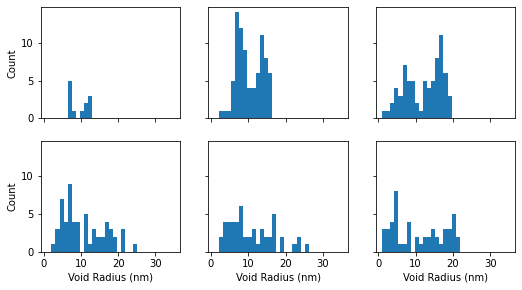

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(8.5, 4.5), sharex=True, sharey=True)

# Get a subset
subset = data.query('temp==550.')
choices = np.linspace(0, len(subset)-1, 6, dtype=np.int)

for ax, choice in zip(axs.flatten(), choices):
    choice = subset.iloc[choice]
    ax.hist(choice['void_radii'], bins=bins)
    
for ax in axs[:, 0]:
    ax.set_ylabel('Count')
for ax in axs[-1, :]:
    ax.set_xlabel('Void Radius (nm)')

Seems like our void sizes are bimodal, in that we have one peak below 10nm and a second at 15 or greater.